Single Agent --->Provided Multiple Tools(Custom tools + Inbuilt tools)

In [ ]:
#A popular Python HTTP library for sending HTTP/1.1 requests (GET, POST, etc.) to interact with web APIs and fetch remote resources.
import requests
#Utilities to embed and render images directly within Jupyter/IPython notebooks for interactive visual output.
from IPython.display import Image,display
#Core classes from LangGraph defining a state-machine graph (StateGraph) and its entry point constant (START) to orchestrate conversational or workflow states.
from langgraph.graph import StateGraph,START
#LangChain integration that wraps OpenAI’s LLM API, enabling prompt submission and response handling within a LangChain pipeline.
from langchain_openai import OpenAI
#Typed message objects representing user (“Human”) and system instructions in LangChain’s chat message schema to structure prompts.
from langchain_core.messages import HumanMessage,SystemMessage
#A LangGraph state node for storing and managing a sequence of chat messages as part of the graph’s execution context.
from langgraph.graph import MessagesState
#Prebuilt LangGraph nodes—ToolNode to invoke external tools and tools_condition to branch logic based on tool outputs.
from langgraph.prebuilt import ToolNode,tools_condition
#standard typing helper that attaches metadata (ex:validation rules) to existing types for tooling and runtime introspection.
from typing import Annotated
#Enables the definition of dictionary types with fixed keys and value type useful for more precise type checking in Python versions before 3.9.
from typing_extensions import TypedDict
#helper function to append one or more HumanMessage/SystemMessage objects into a MessagesState, updating the conversation history.

from langgraph.graph.message import add_messages 


In [2]:
#State has a messages list, and updates to it go through add_messages so new chat entries get added, not overwritten
#telling LangGraph whenever someone puts new chat lines into this box, automatically use the add_messages helper to append them properly instead of just replacing the whole list.
class State(TypedDict):
    messages:Annotated[list,add_messages]


In [3]:
#Tool
!pip install -U duckduckgo-search

   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   --------------------- ------------------ 2.1/3.8 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 3.8/3.8 MB 11.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ---------------- ----------------------- 1.3/3.1 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 3.1/3.1 MB 9.3 MB/s eta 0:00:00

   ---------- ----------------------------- 1/4 [lxml]
   ---------- ----------------------------- 1/4 [lxml]
   ---------- ----------------------------- 1/4 [lxml]
   ---------- ----------------------------- 1/4 [lxml]
   -------------------- ------------------- 2/4 [click]
   -------------------- ------------------- 2/4 [click]
   ------------------------------ --------- 3/4 [duckduckgo-search]
   ---------------------------------------- 4/4 [duckduckgo-search]



In [4]:

from langchain_community.tools import DuckDuckGoSearchRun
search=DuckDuckGoSearchRun()
search.invoke("Michael Jackson most famous song")

'A list of Michael Jackson\'s greatest hits, from \'Butterflies\' to \'They Don\'t Care About Us\', with stories and trivia behind each song. Find out which song is his most famous and how it was inspired by a TV special. From moonwalks to music videos, Michael Jackson\'s artistry transcended boundaries. Here is a ranking of his greatest tracks. ... Pink Floyd\'s top 10 most popular songs ranked - No. 2 is an all ... Discover the best songs of the King of Pop, from Billie Jean to Thriller, and how they changed the music industry forever. Learn about the stories, genres, and influences behind his most famous hits and their iconic music videos. Michael Jackson, the King of Pop, left an indelible mark on music, dance, and culture. His songs continue to resonate with fans worldwide, offering timeless melodies, infectious beats, and heartfelt lyrics. Let\'s dive into the top 30 Michael Jackson songs that made history, inspired generations, and remain as relevant today as ever. Michael Jacks

In [6]:
from langchain_community.tools import DuckDuckGoSearchRun

def search_duckduckgo(query:str):
    """Search on DuckDuckGo using langchain DuckDuckGo  Search Run tools"""
    search=DuckDuckGoSearchRun()
    return search.invoke(query)

result=search_duckduckgo("who is Michael Jackson")
print(result)

Learn about the life and career of Michael Jackson, an American singer, songwriter, dancer, and philanthropist who is regarded as one of the most culturally significant figures of the 20th century. Explore his achievements, controversies, death, and legacy in this comprehensive article. Learn about Michael Jackson, the American singer, songwriter, and dancer who was the "King of Pop" and one of the most influential entertainers in history. Explore his life, career, achievements, controversies, and death in this comprehensive article. Michael Jackson, often hailed as the 'King of Pop,' was more than just an iconic American singer, songwriter, and dancer; he was a global phenomenon who reshaped the landscape of music, dance, and popular culture. His influence extended beyond his Michael Jackson-level dance moves and vocals, touching the hearts and souls of millions worldwide. ... Michael Joseph Jackson was born on August 29, 1958, in Gary, Indiana, the eighth of ten children in the Jacks

In [8]:
#Custom tool(Tool meaning Functions)
#Add Tool
def add(a:int,b:int) ->int:
    """Add two numbers"""
    return a+b 

add(4,6)

10

In [16]:
#Custom tool(Tool meaning Functions)
#Multiply Tool
def multiply(a:int,b:int) ->int:
    """Multiply two numbers"""
    return a*b 

multiply(4,6)

24

In [17]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

llm=ChatOpenAI(temperature=0,model="gpt-4o-mini")

In [18]:
llm.invoke("hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_54eb4bd693', 'id': 'chatcmpl-BZUBjVKvhX66On9GUh2lhiRCa3fKU', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--80ec66e8-3b91-4f0b-9b5b-8d500976b161-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [19]:
#Binding tools(passing information to llm that if you dont have any answer in this case tools are there to help)
tools=[search_duckduckgo,add,multiply]
llm_with_tools=llm.bind_tools(tools)

In [20]:
llm_with_tools

RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x0000025F5E27F320>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x0000025F5E27F3B0>, root_client=<openai.OpenAI object at 0x0000025F5E27CAA0>, root_async_client=<openai.AsyncOpenAI object at 0x0000025F5E27DEB0>, model_name='gpt-4o-mini', temperature=0.0, model_kwargs={}, openai_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'search_duckduckgo', 'description': 'Search on DuckDuckGo using langchain DuckDuckGo  Search Run tools', 'parameters': {'properties': {'query': {'type': 'string'}}, 'required': ['query'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'add', 'description': 'Add two numbers', 'parameters': {'properties': {'a': {'type': 'integer'}, 'b': {'type': 'integer'}}, 'required': ['a', 'b'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'multiply', 

In [22]:
#Now Chatbot
#Defines a chatbot function that takes the current state, invokes the LLM (with tools) on its messages, and returns a new state containing the LLM’s response in a messages list.
def chatbot(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

In [ ]:
#This sets up and compiles a StateGraph called react_graph by adding an “assistant” node (your chatbot), a tools node for external tool calls, 
# wiring the start to the assistant, branching into tools when needed, looping back to the assistant, and then compiling it into an executable graph.
from langgraph.prebuilt import ToolNode,tools_condition
graph_builder=StateGraph(State)

#Define Node
graph_builder.add_node("assistant",chatbot)
graph_builder.add_node("tools",ToolNode(tools))

#Define edges
graph_builder.add_edge(START,"assistant")
graph_builder.add_conditional_edges("assistant",tools_condition)
graph_builder.add_edge("tools","assistant")
react_graph=graph_builder.compile()



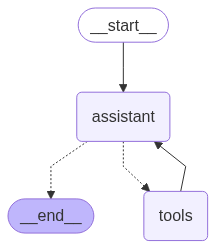

In [24]:
react_graph

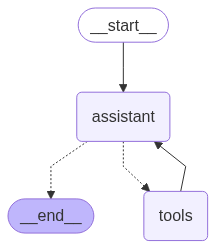

In [26]:
#To see graph connectivity

display(Image(react_graph.get_graph().draw_mermaid_png()))

In [30]:
#Making Agent
#Runs the react_graph on a user message asking “what is the weather in Patna. Multiply it by 4 and add 8,” then prints out the assistant’s response state.
#react_graph is the Agent

response=react_graph.invoke({"messages":[HumanMessage(content="what is the weather in Patna.Multipy it by 4 and add 8")]})
print(response)

{'messages': [HumanMessage(content='what is the weather in Patna.Multipy it by 4 and add 8', additional_kwargs={}, response_metadata={}, id='1f686fec-d980-43aa-a358-b7837ec72d04'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_AbtAJsLYLzRhoVmEmYIoEWi2', 'function': {'arguments': '{"query":"current weather in Patna"}', 'name': 'search_duckduckgo'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 116, 'total_tokens': 137, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_54eb4bd693', 'id': 'chatcmpl-BZUbxL1PIEn9RJJf5tA17ji11Mvcs', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--c4308651-fd41-4820-aa54-2e61c1230ea3-0', tool_calls=[{'name': 'se

In [31]:
#For better Readability

for m in response['messages']:
    m.pretty_print()
 

================================ Human Message =================================

what is the weather in Patna.Multipy it by 4 and add 8
================================== Ai Message ==================================
Tool Calls:
  search_duckduckgo (call_AbtAJsLYLzRhoVmEmYIoEWi2)
 Call ID: call_AbtAJsLYLzRhoVmEmYIoEWi2
  Args:
    query: current weather in Patna
================================= Tool Message =================================
Name: search_duckduckgo

Weather in Bihar, Patna: Get the current weather, hourly and weekly weather forecast for Patna, along with current temperature, rainfall, wind speed, humidity, air-quality, 15-days weather forecast and season trend for Patna. At the moment, in Patna, the air is filled with light mist, creating a dreamy scene. The temperature is a temperate 29°C, and the felt air temperature of which represents the influence of relative humidity on air temperature comes in at evaluated at a torrid 36°C.The current temperature is only a few 